# GRIP : The Sparks Foundation

# Author : Savitri Yadav

## Data Science and Business Analytics Intern

## Task 1 - Exploratry_Data_Analysis_On_Retail


### In this task we have to pridict the weak areas where you can work to make more profit.

In [1]:
# Importing required libraries
import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plt.style.use("seaborn-whitegrid")
import seaborn as sns 
%matplotlib inline
sns.set_palette("PRGn_r")
import warnings
warnings.filterwarnings('ignore')

In [2]:
ssd = pd.read_csv("SampleSuperstore.csv")
ssd.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Structure of dataset

In [3]:
ssd.shape

(9994, 13)

In [4]:
ssd.size

129922

In [5]:
ssd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Identify missing values 

In [6]:
ssd.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Checking for duplication

In [7]:
ssd.duplicated().sum()

17

In [8]:
ssd.drop_duplicates()
ssd.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Dropping Unnecessary columns from the Dataset

In [9]:
ssd.Country.unique()

array(['United States'], dtype=object)

In [10]:
ssd = ssd.drop(columns=['Postal Code', 'Country'], axis=1)
ssd.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Statistics of Data

In [11]:
ssd.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Data Exploration

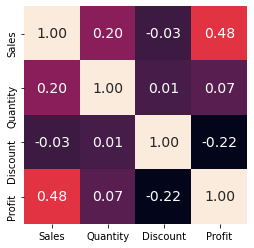

In [12]:
# PLotting Correlation between Variables
plt.figure(figsize=(4,4))
sns.heatmap(ssd.corr(), annot=True, cbar=False,fmt='.2f', annot_kws={'size':14})
plt.show()

## Plotting Overall Sales Summary

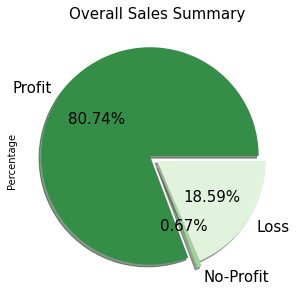

In [13]:
summary = pd.DataFrame({'Profit':ssd.Quantity[ssd.Profit > 0].sum(), 
                        'No-Profit':ssd.Quantity[ssd.Profit == 0].sum(), 
                        'Loss':ssd.Quantity[(ssd.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=15)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(5,5), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0))
plt.show()

## Observations for each product category 

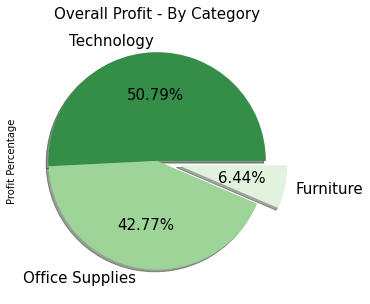

In [14]:
cat = np.round(ssd.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=15)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(5,5), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

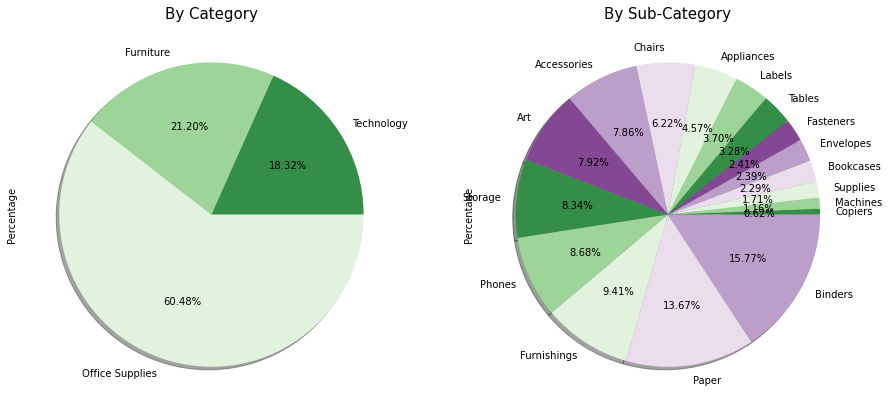

In [15]:
cat = ssd.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = ssd.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)
cat.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

## Plotting Category, Shipmode, Segment, and Region-wise profit

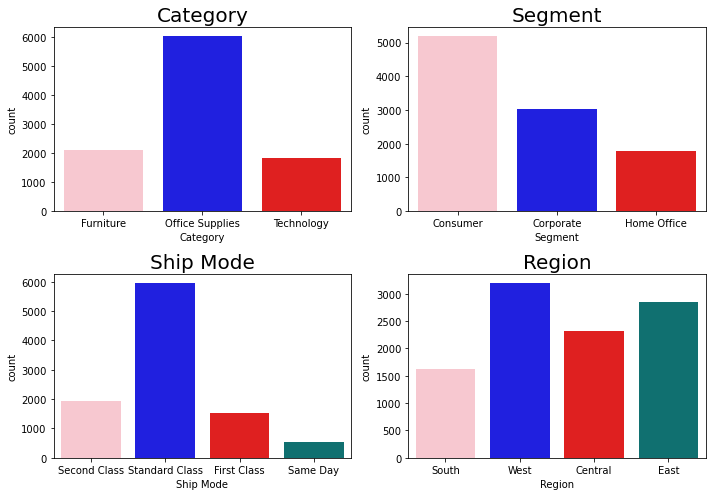

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
sns.countplot(ssd['Category'], ax = axs[0][0], palette = ['pink','blue','red','teal'])
sns.countplot(ssd['Segment'], ax = axs[0][1], palette =  ['pink','blue','red','teal'])
sns.countplot(ssd['Ship Mode'], ax = axs[1][0], palette =  ['pink','blue','red','teal'])
sns.countplot(ssd['Region'], ax = axs[1][1], palette =  ['pink','blue','red','teal'])
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

## Plot Sales and Profit for comparisons

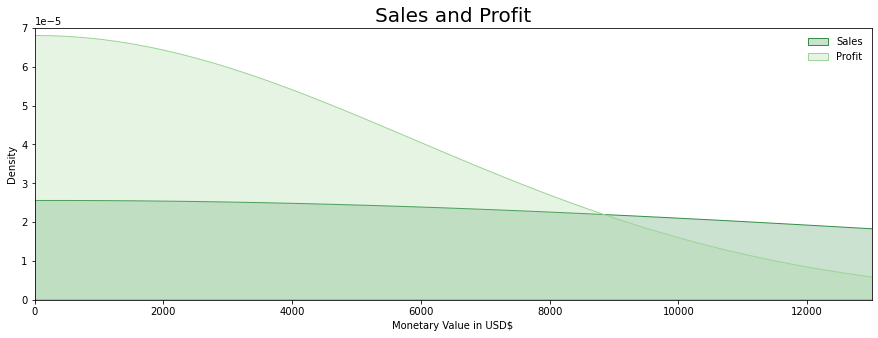

In [17]:
plt.figure(figsize = (15, 5))
sns.kdeplot(ssd['Sales'],  palette="Set2", label = 'Sales', shade = True, bw = 25)
sns.kdeplot(ssd['Profit'], label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

## State-wise analysis

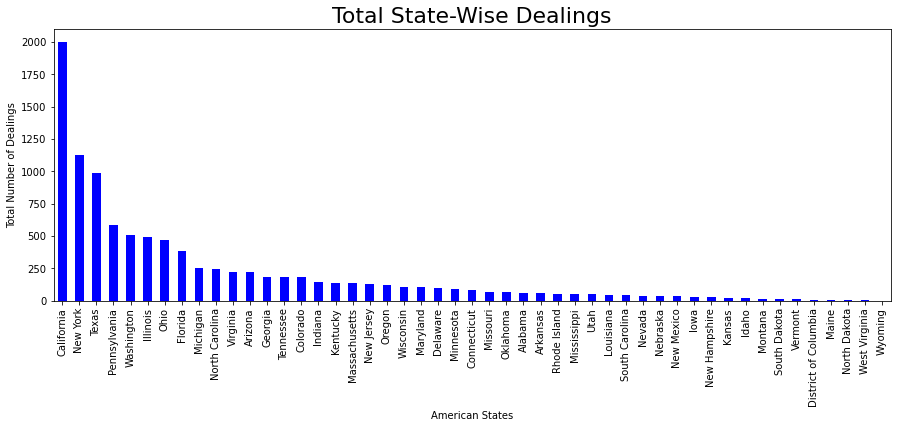

In [18]:
ssd_state_dealings = ssd.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5), color = 'Blue')                                                                                                 
plt.ylabel('Total Number of Dealings')
plt.xlabel('American States')
plt.title('Total State-Wise Dealings', fontsize = 22)
plt.show()

### The states of Wyoming, South Dakota, Maine, West Virginia, and North Dakota have comparatively negligible sales. Even if the Superstore outlets here are newly opened, marketing strategies should be improved in these areas as well as the states with less than USD$20k total sales.

## Total sales for each state

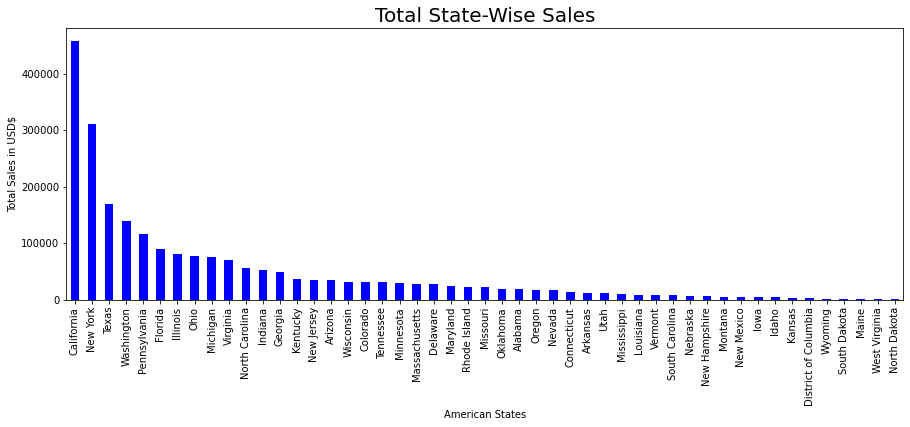

In [19]:
ssd_state_sales = ssd.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), color = 'Blue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

## Total Profit for each State

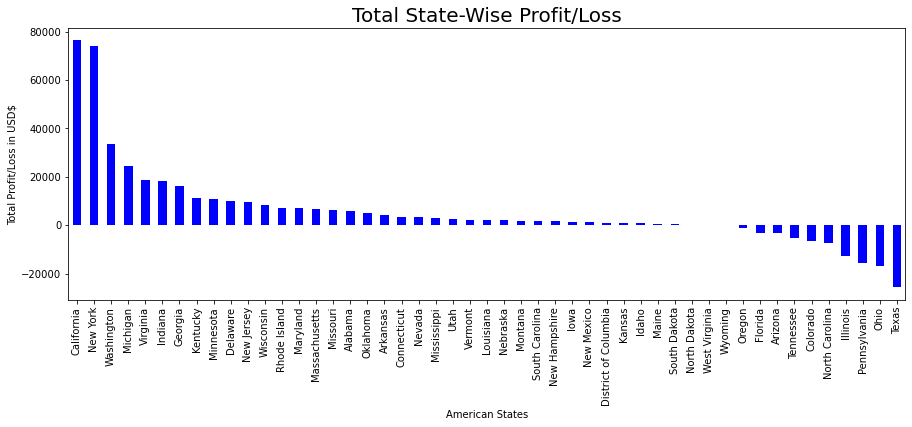

In [20]:
ssd_state_profit = ssd.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), color = 'Blue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

## Average Discount for each State

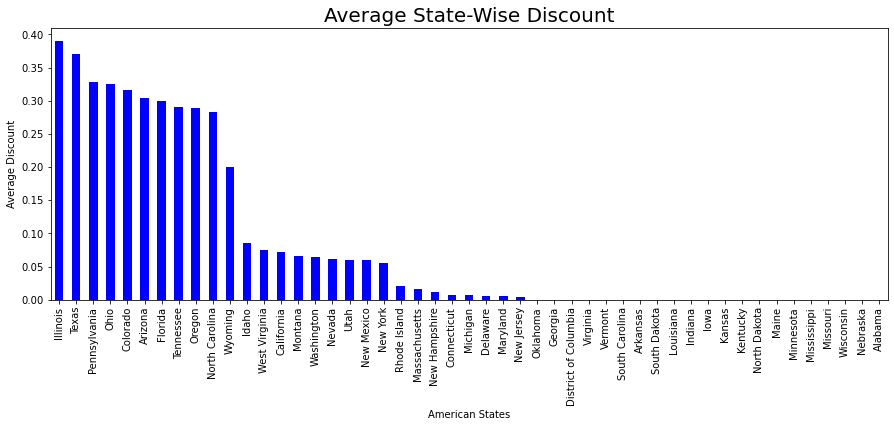

In [21]:
ssd_state_profit = ssd.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), color = 'Blue')                                                                                               
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()


## Average Sales and Profit of Category

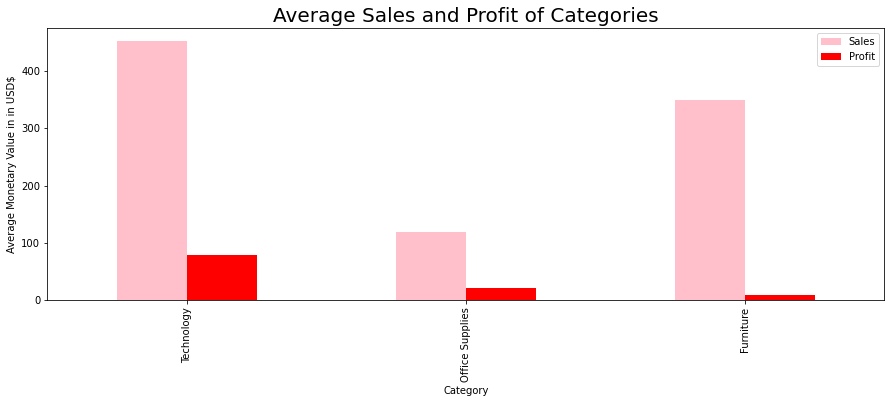

In [22]:
ssd_category = ssd.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
ssd_category.sort_values('Profit', ascending = False)[["Sales", "Profit"]].plot(kind = 'bar',figsize = (15, 5), color = ['Pink','Red'])                                                                            
plt.ylabel('Average Monetary Value in in USD$')
plt.xlabel('Category')
plt.title('Average Sales and Profit of Categories', fontsize = 20)
plt.show()

## Average Sales and Profit of Ship Mode

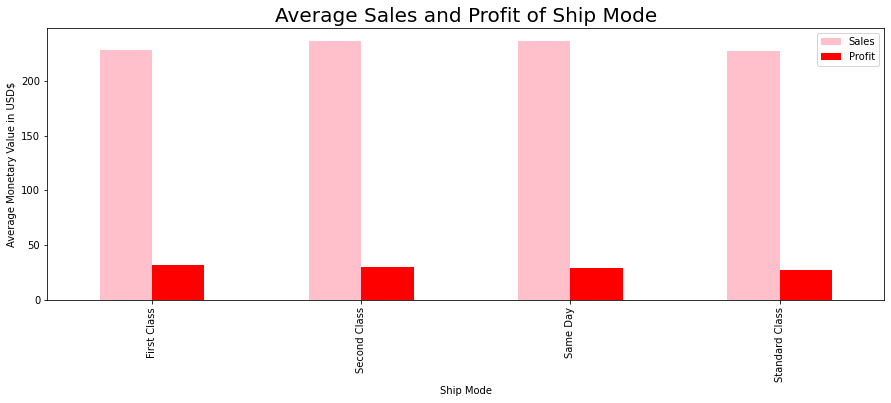

In [23]:
ssd_ship = ssd.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
ssd_ship.sort_values('Profit', ascending = False)[["Sales", "Profit"]].plot(kind = 'bar',figsize = (15, 5), color=['Pink','Red'])                                                                                                                                         
plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Ship Mode')
plt.title('Average Sales and Profit of Ship Mode', fontsize = 20)
plt.show()

## Profit or loss by Discount level

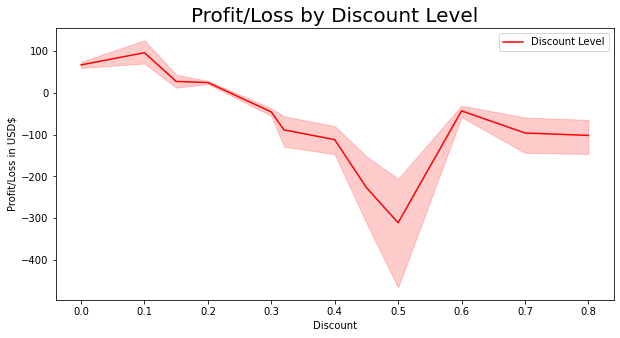

In [24]:
plt.figure(figsize = (10, 5))
sns.lineplot('Discount', 'Profit', data = ssd, label = 'Discount Level', color ='Red')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

In [25]:
print(f'Total items Sold: {ssd.Quantity.sum()}')

Total items Sold: 37873


In [26]:
print(f'Total Profit: {ssd.Profit.sum()}')

Total Profit: 286397.0217


In [27]:
print(f'Total Sales: {ssd.Sales.sum()}')

Total Sales: 2297200.8603


## Thank You!